In [103]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
sns.set()

In [104]:
#loading the dataset
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [105]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [106]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [107]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [108]:
#checking for null values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

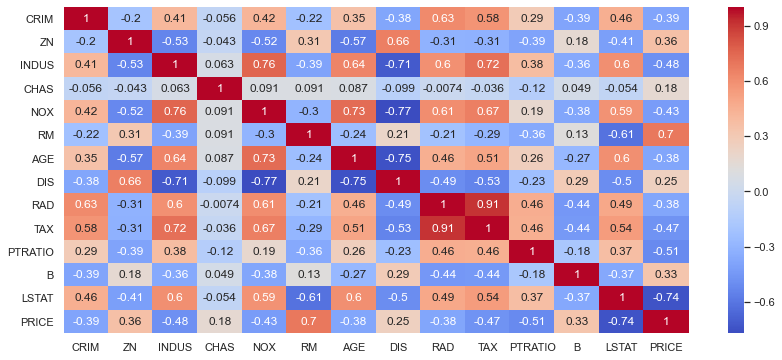

In [109]:
#checking the correlation between the features
plt.figure(figsize=(14,6))
sns.heatmap(bos.corr(),cmap='coolwarm',annot=True)

In [110]:
#RAD and TAX seems to be highly correlated
#LSTAT is negatively correlated with Price
#RM is positively correlated with Price

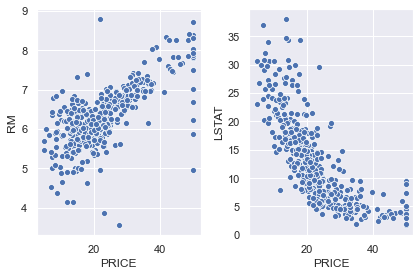

In [111]:
fig,axes = plt.subplots(1,2)
sns.scatterplot(x='PRICE',y='RM',data=bos,ax=axes[0])
sns.scatterplot(x='PRICE',y='LSTAT',data=bos,ax=axes[1])
plt.tight_layout()

In [112]:
# Seperating features and target variable
X = bos.drop(['PRICE'],axis=1)
y = bos['PRICE']

In [113]:
# Normalising the dataset
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
# checking for multi-collinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame() 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [115]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [116]:
#dropping 'RAD' as it is highly correlated with 'TAX'
X.drop('RAD',axis=1,inplace=True)

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [118]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((379, 12), (379,), (127, 12), (127,))

In [120]:
classifier = RandomForestRegressor()

In [121]:
classifier.fit(X_train,y_train)

C:\Users\palam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [122]:
classifier.score(X_train,y_train)

0.962237810628099

In [123]:
classifier.score(X_test,y_test)

0.8600928616946835

In [60]:
#Doing hyperparameter tuning

In [65]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mse'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [66]:
grid_search = GridSearchCV(estimator=classifier,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [67]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': ra

In [68]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=115,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [124]:
classifier = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=115,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [125]:
classifier.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=115,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [126]:
y_pred = classifier.predict(X_test)

In [127]:
r2_score(y_test,y_pred)

0.8817561660424773